## Final Project Submission

Please fill out:


Student name: 


***Alvin Kimathi***


* Student pace: Hybrid Full-Time

* Scheduled project review date/time: 7th June 2024

* Instructor name: Maryann Mwikali

* Blog post URL:

## BUSINESS PROBLEM

SyriaTel, a tele-communications company in the Middle East has brought to our attention(Anonymous Analysts) the upward rate in which its clients are stopping usage of their product. The are looking to get ahead of the customer churn as it is easier to retain and get a return client than it is to onboard a new client.The company therefore wants to take pro-active measures to identify those likely to churn and retain them while improving customer satisfaction and reducing revenue loss.

### Objectives 
* Identify Key factors leading to churn
* Develop a predictive model that accurately predicts whether a customer will churn
* After visualizations propose necessary interventions

## 1: DATA UNDERSTANDING

We obtained our data set from Kaggle, an online hosting service which provided us with the necessary dataset to analyze this field.

#### 1.1: Import Necessary Libraries

In [1]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing and model building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#For Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


#For Evaluation

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, roc_curve

### 1.2: Load our Dataset

In [2]:
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 1.3: Explore and Understand our Data set

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## 2: DATA CLEANING AND PREPROCESSING

### 2.1: Handle any Missing Values

In [4]:
#Check for any missing values
print("\nMissing Values in Data:")
print(data.isnull().sum())


Missing Values in Data:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


## 3: EXPLORATIVE DATA ANALYSIS

#### 3.1: Distribution of Churn

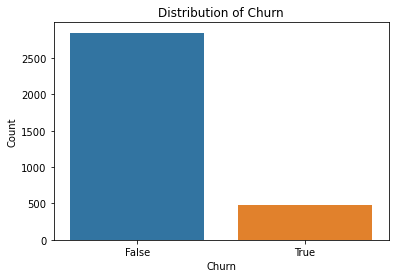

False    85.508551
True     14.491449
Name: churn, dtype: float64

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()
#Percentage of True/False in the distribution
churn_percentage = data['churn'].value_counts(normalize=True)* 100
churn_percentage

From this, we note that approximately 85% of the customers are still using the service while 14% have actively stopped using the service.

### 3.2: Univariate Analysis

#### 3.2.1: Distribution of Numerical features

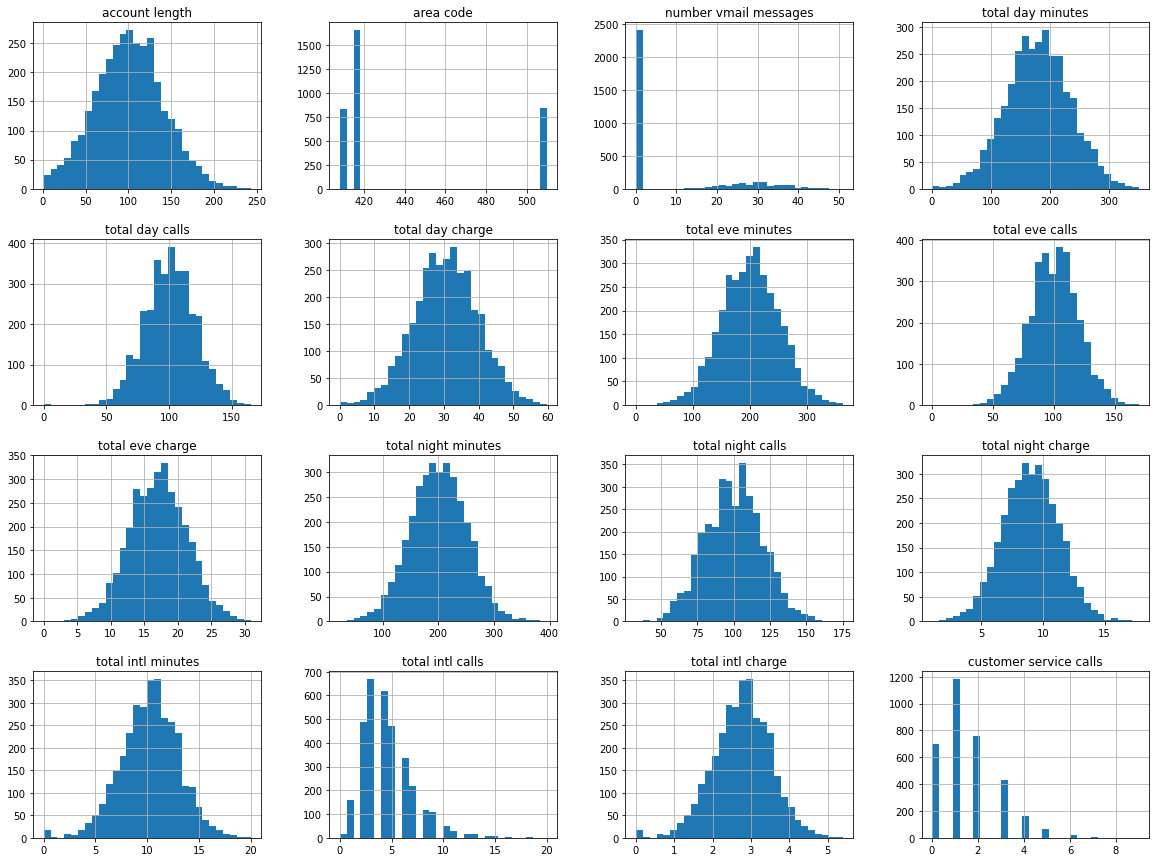

In [6]:
#Histograms for the numeric variables excluding boolean colums
#Define numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features].hist(bins=30, figsize=(20, 15))
plt.show()


### 3.3: BiVariate Analysis

#### 3.3.1: Box Plots for Numeric Features vs Churn

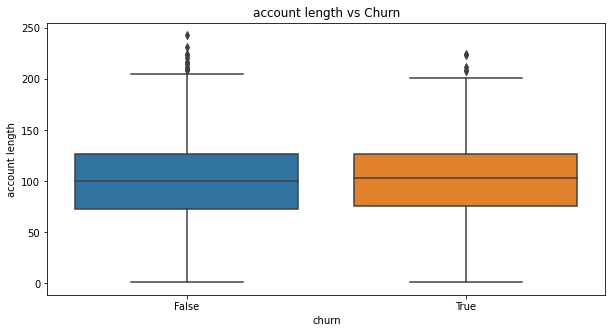

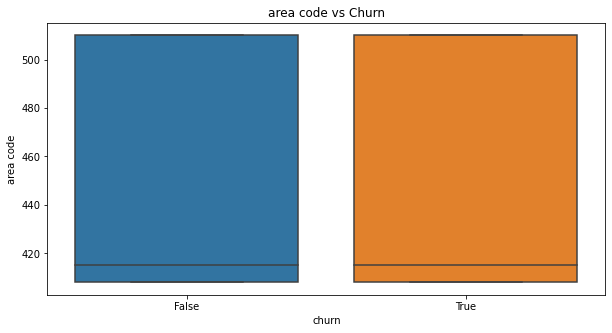

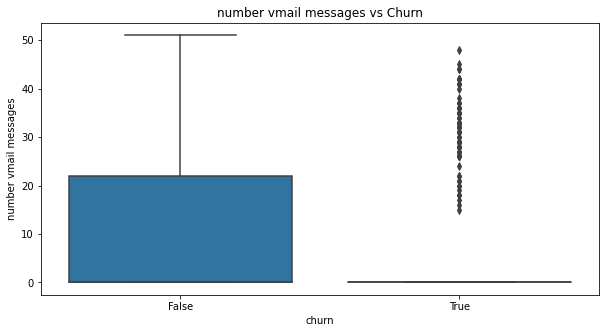

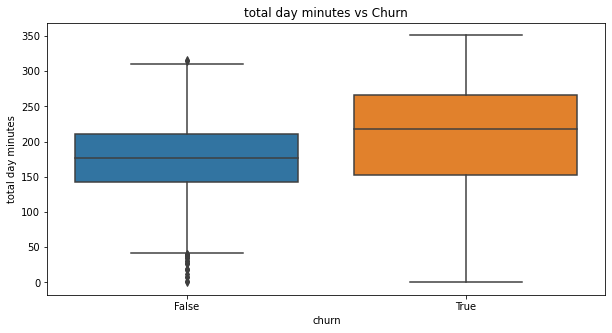

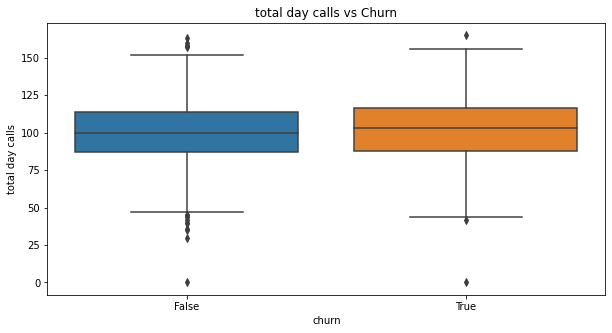

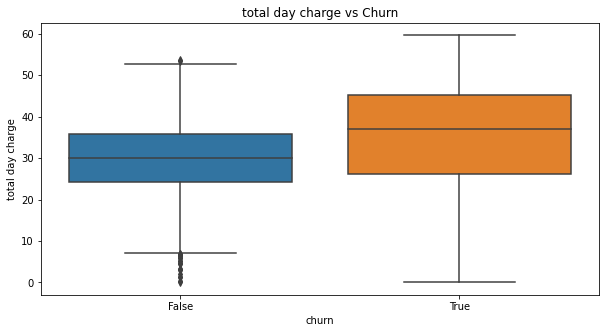

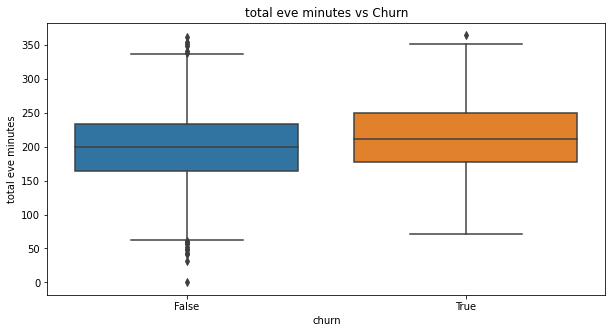

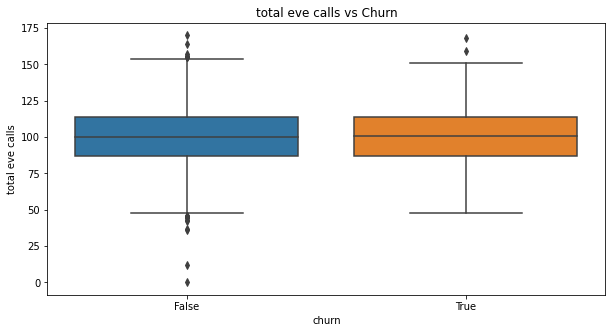

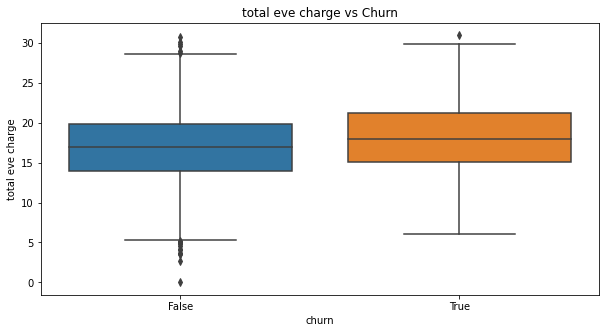

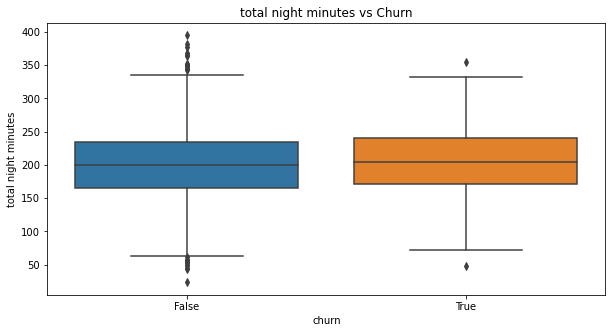

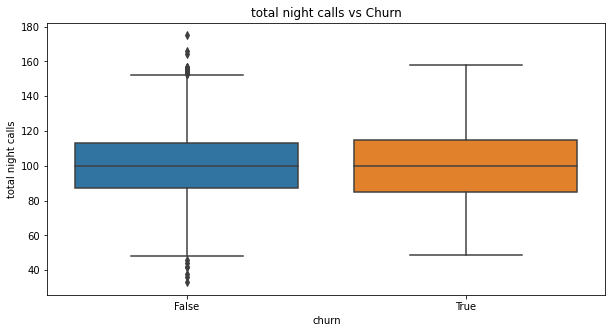

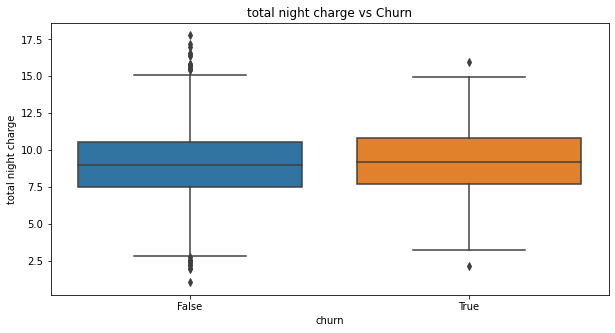

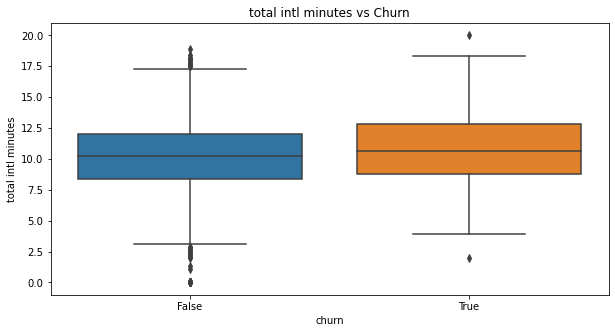

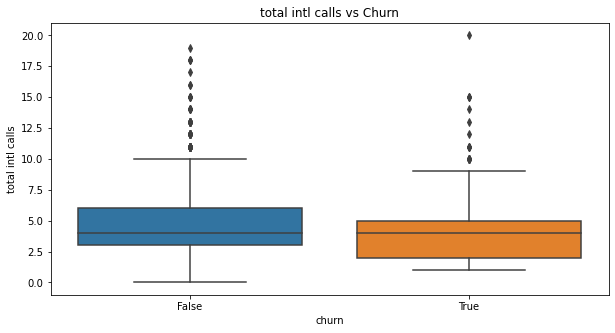

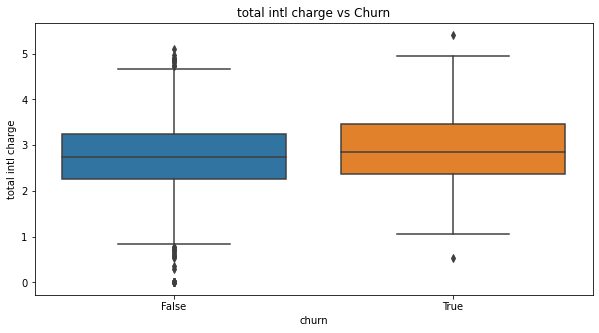

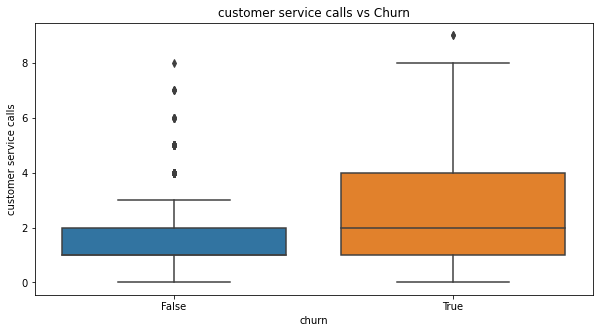

In [7]:
#exclude the 'churn' column
numeric_features = [feature for feature in numeric_features if feature != 'churn']

# Plot box plots for numerical features against Churn
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'{feature} vs Churn')
    plt.show()


#### 3.3.2: Count plots of Categorical features to Churn

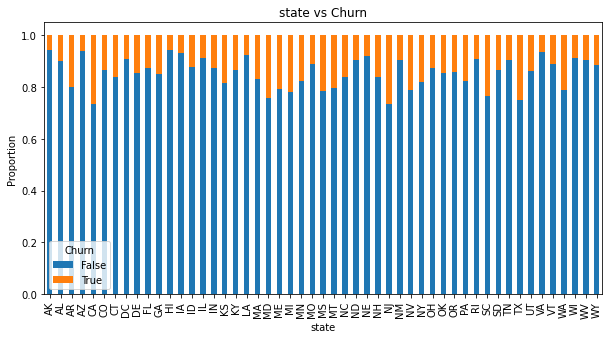

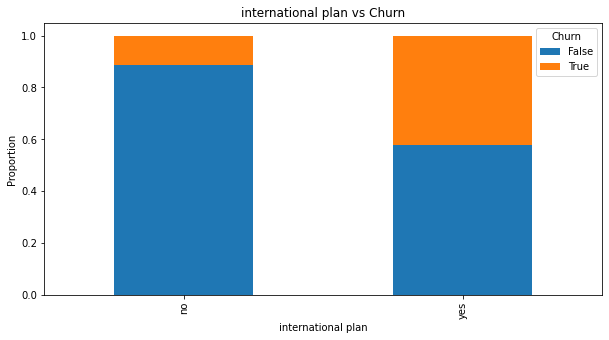

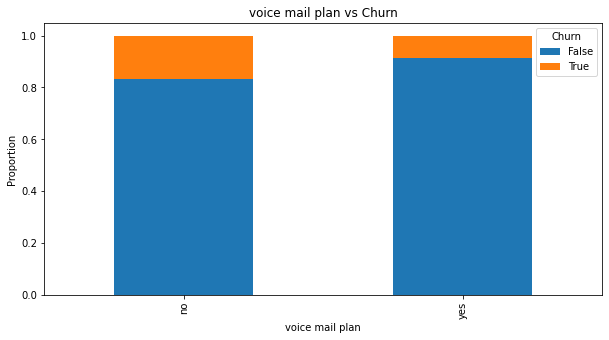

In [8]:
# Identify categorical features and exclude the 'phone number' column
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features = [feature for feature in categorical_features if feature != 'phone number']

# Plot cross-tabulations for categorical features against the target variable
for feature in categorical_features:
    cross_tab = pd.crosstab(data[feature], data['churn'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'{feature} vs Churn')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.legend(title='Churn')
    plt.show()


From this, one outstanding observation is that customers with an international plan are more likely to churn than those without.....probably due to higher costs if the plan is not enough to justify the cost and maybe for a short-term need as well.

#### 3.3.3: Relationship between Numerical features and Churn

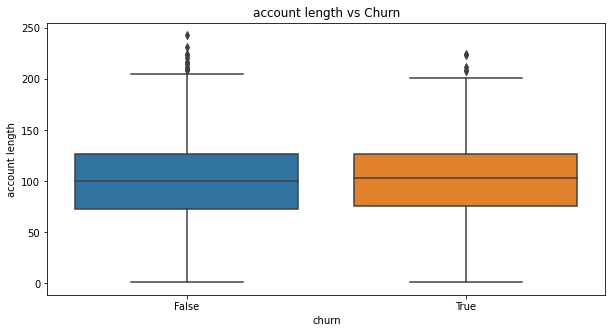

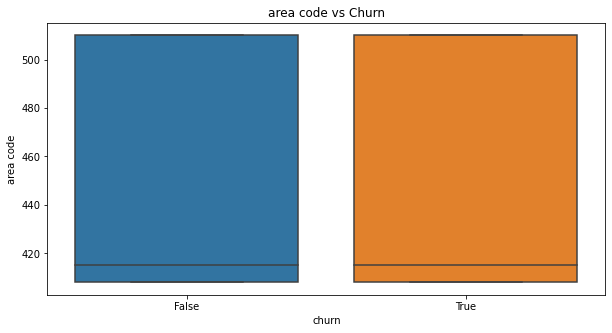

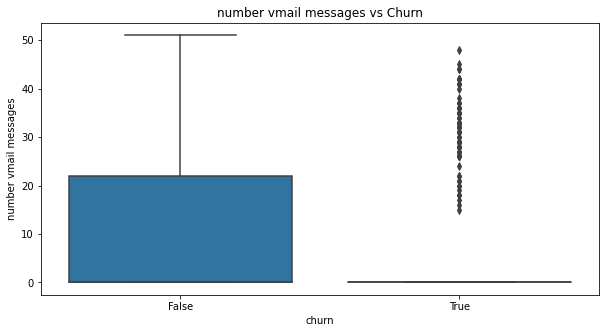

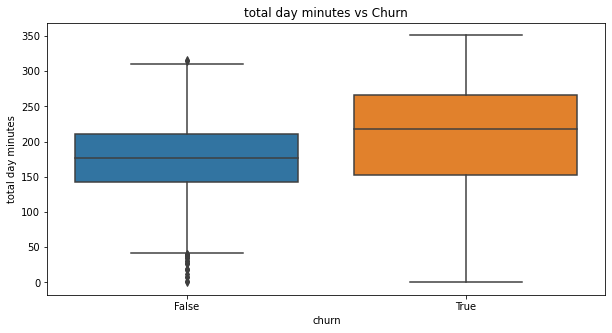

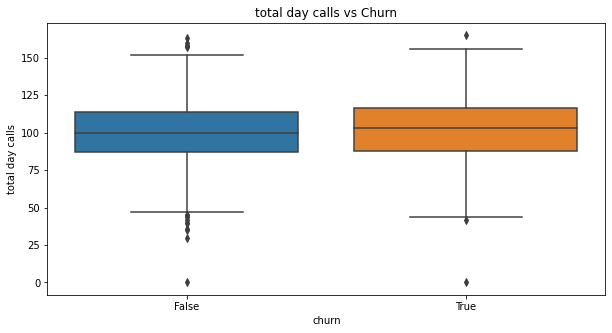

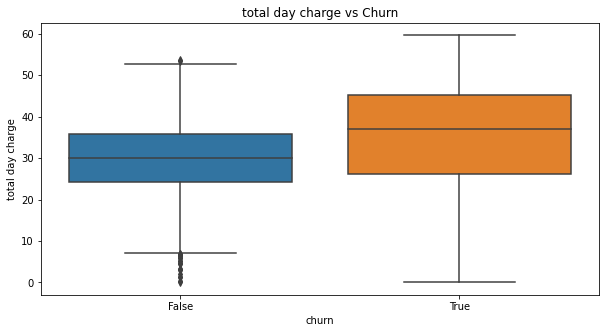

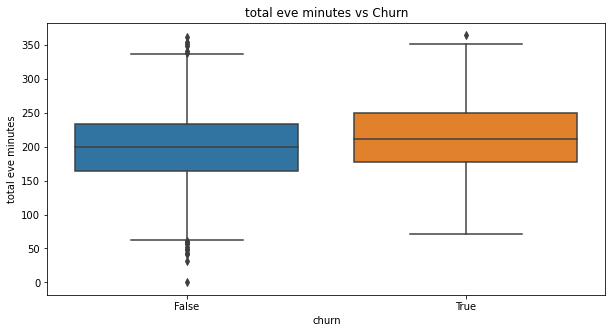

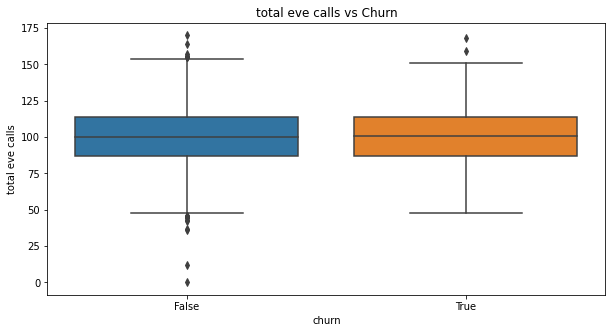

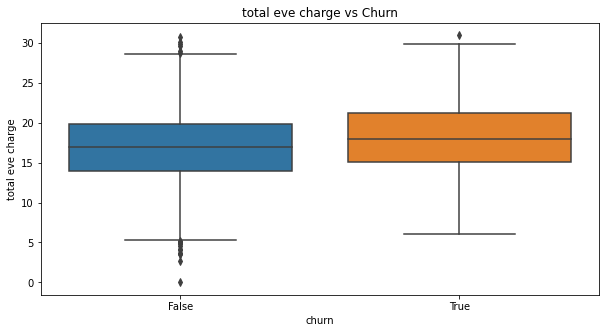

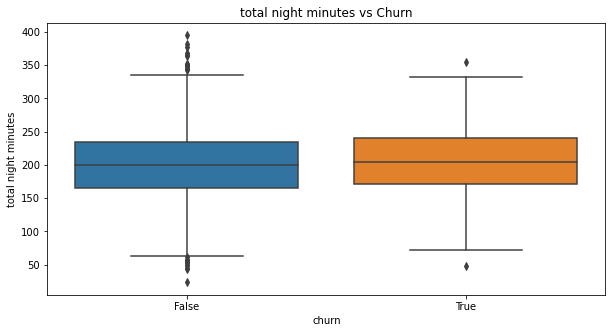

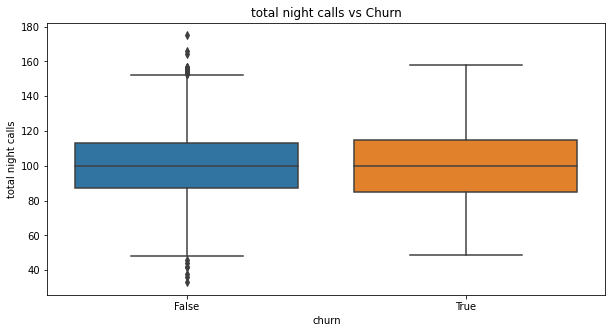

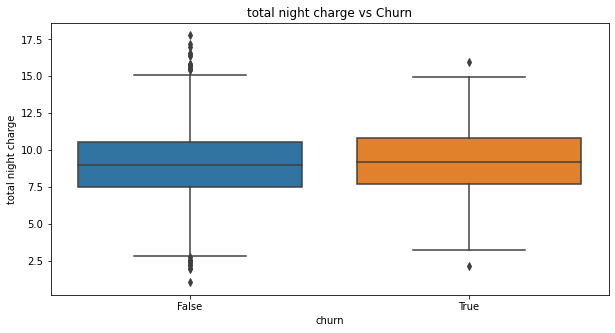

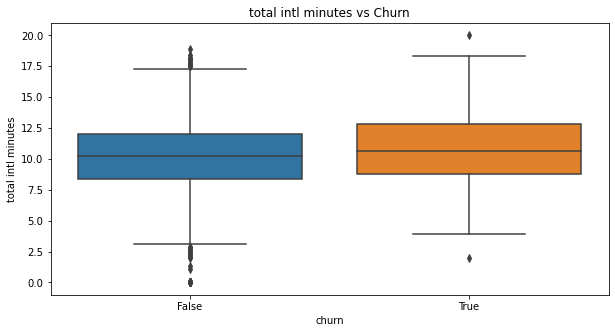

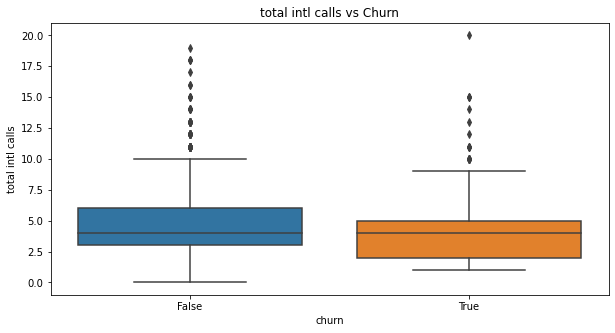

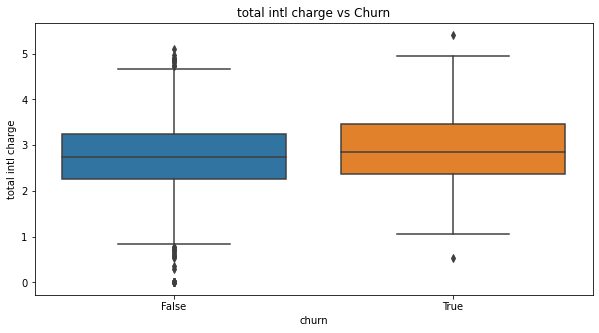

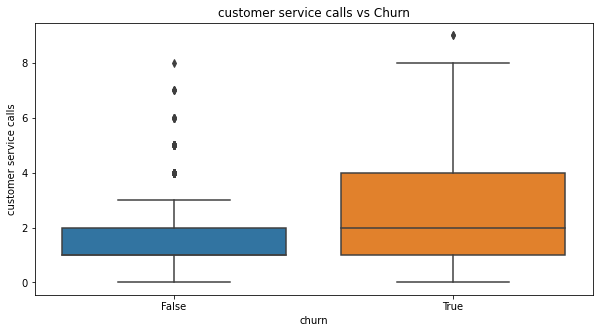

In [9]:
# Box plots for numeric features against the target variable(Churn)

for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'{feature} vs Churn')
    plt.show()


### 3.4: MultiVariate Analysis

#### 3.4.1: Correlation Matrix

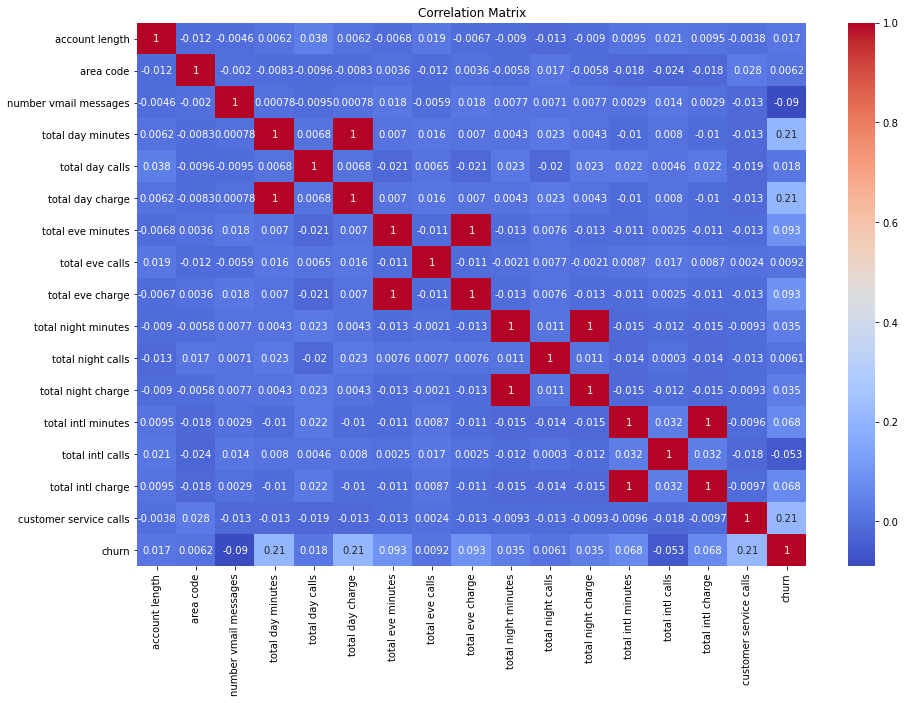

In [10]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From this correlation heatmap we can deduce the following:
* Positive correlation between customer service calls and churn(0.21) means customers who call the service are slightly more likely to churn
* Positive correlation between total day minutes and churn(0.21) means customers who talk more during the day are also slightly likely to churn
* Positive correlation between total day charge and churn(0.21) means rates from the service provider might slightly influence the customer to churn as they continue usage.
Let us also remeber that correlation does not entirely equal causation as there might be other factors at play.

### 3.5: Encoding Categorical variables

In [11]:
# Identify binary categorical features for Label Encoding
binary_features = ['voice mail plan', 'international plan']  

# Identify multi-class categorical features for One-Hot Encoding
multi_class_features = [feature for feature in categorical_features if feature not in binary_features]

# Apply Label Encoding to binary features
label_encoders = {}
for feature in binary_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Apply One-Hot Encoding to multi-class features
data = pd.get_dummies(data, columns=multi_class_features, drop_first=True)

# Verify the transformations
print(data.head())


   account length  area code phone number  international plan  \
0             128        415     382-4657                   0   
1             107        415     371-7191                   0   
2             137        415     358-1921                   0   
3              84        408     375-9999                   1   
4              75        415     330-6626                   1   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total day charge  total eve minutes  ...  state_SD  state_TN  state_TX  \
0             45.07              197.4  ...  

### 3.6: Train-Test Split Test
Train our data from the data set to be used.

In [12]:
# Define features and target
X = data.drop(columns=['churn','phone number'])
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 3.7: Scaling our Data
To bring out improved metrics in our model building and prevent leakage as well

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

## 4: Model Building
### 4.1: Model 1 (Baseline Model-Logistic Regression)

In [14]:
Model_1 = LogisticRegression(max_iter=1000)
Model_1.fit(X_train_scaled, y_train)

y_pred = Model_1.predict(X_test_scaled)
y_pred_prob = Model_1.predict_proba(X_test_scaled)[:, 1]

Logistic Regression Accuracy: 0.8575712143928036
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667

Logistic Regression ROC AUC Score: 0.8164293461148235


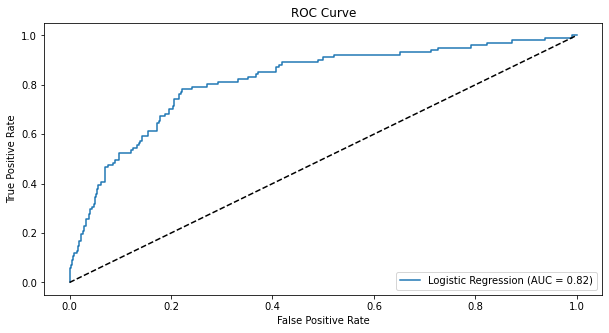

In [15]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 4.2: Model 2 (Random Forest Regression Model)

Random Forest Accuracy: 0.9400299850074962
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.93      1.00      0.97       566
        True       1.00      0.60      0.75       101

    accuracy                           0.94       667
   macro avg       0.97      0.80      0.86       667
weighted avg       0.94      0.94      0.93       667

Random Forest ROC AUC Score: 0.9224976384564252


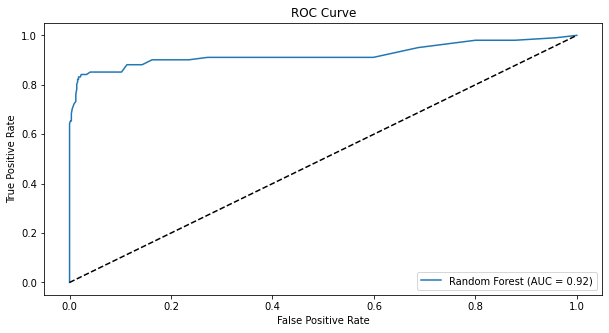

In [16]:
# Train the random forest model
Model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
Model_2.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = Model_2.predict(X_test_scaled)
y_pred_prob_rf = Model_2.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

# Plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 5))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### 4.3: Model 3 (Random Forest Model with HyperParameters Tuning)
In this Particular instance,Grid Search

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.9min finished


Best Random Forest Accuracy: 0.9370314842578711
Best Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.99      0.96       566
        True       0.93      0.63      0.75       101

    accuracy                           0.94       667
   macro avg       0.93      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667

Best Random Forest ROC AUC Score: 0.9235384669208971


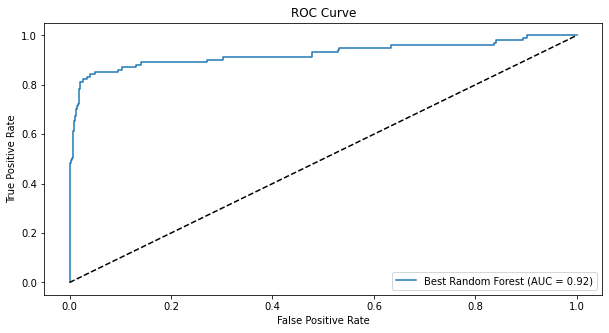

In [17]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
y_pred_prob_best_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Best Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_best_rf))

# Plot ROC curve
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_pred_prob_best_rf)
plt.figure(figsize=(10, 5))
plt.plot(fpr_best_rf, tpr_best_rf, label='Best Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob_best_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### 4.4: Model 4 K-Nearest Neighbors Model

K-Nearest Neighbors Accuracy: 0.8470764617691154
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.44      0.04      0.07       101

    accuracy                           0.85       667
   macro avg       0.65      0.52      0.49       667
weighted avg       0.79      0.85      0.79       667

K-Nearest Neighbors ROC AUC Score: 0.6905765664905713


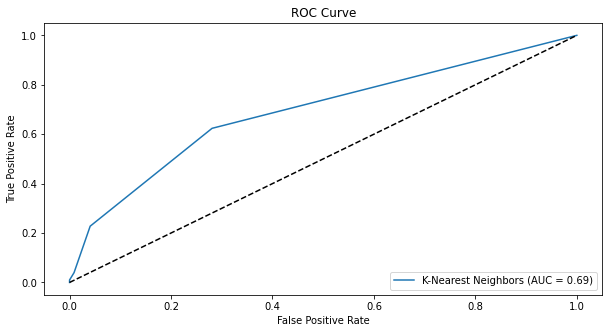

In [18]:
# Train the K-Nearest Neighbors model
Model_4 = KNeighborsClassifier(n_neighbors=5)
Model_4.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = Model_4.predict(X_test_scaled)
y_pred_prob_knn = Model_4.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_knn))

# Plot ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
plt.figure(figsize=(10, 5))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob_knn))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### 5: Evaluation

#### 5.1: Model 1(Baseline Model)
From this Logistic Regression model, we can deduce;
* Imbalanced Dataset: The dataset is imbalanced, with 566 non-churning and 101 churning customers. This imbalance affects the performance metrics, particularly for the minority class (churning customers).
* High Precision but Low Recall for Churn: The model has a reasonable precision for predicting churn (58%), meaning that when it predicts churn, it is correct more than half the time. However, it struggles with recall (21%), meaning it misses a significant number of actual churning customers.
* Strong Performance for Non-Churn: The model performs very well for non-churning customers, with high precision (87%) and recall (97%), indicating it is very reliable in identifying customers who will not churn.
* Weighted Metrics: The weighted averages suggest the model has good overall performance, but the poor recall for churn indicates a need for improvement if predicting churn accurately is critical


#### 5.2: Model 2 (Random Forest Model)

From this Random forest Classification model, we can deduce:
* The ROC AUC score of 0.92 indicates a very good ability to distinguish between churning and non-churning customers.
* Improved Performance: The Random Forest model shows significantly improved performance over the logistic regression model, particularly in precision and F1-score for the True (churning) class.
* High Precision for Churn: The precision for the True class is perfect (1.00), meaning there are no false positives. Every customer predicted to churn actually churns.
* Balanced Recall: While the recall for the True class (0.60) is not perfect, it is much better than in the logistic regression model, indicating the Random Forest model is better at identifying actual churners.
* Overall Strong Metrics: The high accuracy, precision, recall, and F1-scores, along with the ROC AUC score, indicate that the Random Forest model performs very well across all key metrics.


#### 5.3 Model 3(Tuned Random Forest Model)
For this Tuned Random Forest Model, we can deduce that:
* The ROC AUC score of 0.92 indicates a very good ability to differentiate between churning and non-churning customers.
* High Precision and Recall for Non-Churn: The model performs exceptionally well in predicting non-churning customers, with very high precision (0.94) and recall (0.99).
* Improved Performance for Churn: The precision for predicting churn is very high (0.93), meaning the model makes very few false positive errors. However, the recall (0.63) is still somewhat limited, indicating that some churning customers are not being identified.
* Balanced Metrics: The F1-scores and weighted averages suggest the model has a good balance of precision and recall for both classes, indicating robust overall performance.


#### 5.4 Model 4(K-Nearest Neighbors Model)

For this KNN model, we can deduce that:
* High Recall for Non-Churn: The model performs very well in predicting non-churning customers, with high precision (0.85) and very high recall (0.99).
* Poor Performance for Churn: The model struggles significantly with predicting churning customers, with very low precision (0.44) and extremely low recall (0.04). This results in a very low F1-score (0.07) for the churn class.
* Imbalance Impact: The performance metrics indicate that the model is heavily biased towards the majority class (non-churning customers) and performs poorly on the minority class (churning customers).
* Low ROC AUC: The ROC AUC score of 0.69 shows the model's limited effectiveness in distinguishing between churners and non-churners.

### 5.5 Model Recommendation

Putting into consideration all the perfomance metrics for the models above, we can conclude that our best fit Model for predicting whether a customer will churn or not is MODEL 3.
It has the highest ROC AUC Score demonstrating excellent discrimination capaility with the highest F1 score indicating a balanced performance for precision and recall making it the preferred Model we recommend for use by SyriaTel.


## 6: RECOMMENDATION

So having analyzed the dataset provided for Syriatel customers, we recommend the following:

1. Target High-Risk Customers
Focus retention efforts on customers identified as high-risk by the predictive model 
Recommendation: Implement a priority system for customer service where high-risk customers receive faster and more personalized support. This can be in the form of a dedicated hotline or a special customer service team.

2. Optimize Service Plans
High total day charges are associated with higher churn rates.
Review and optimize the pricing and features of your day-time call plans.
Offer customized plans with lower day-time charges for high-usage customers. Consider promotional offers such as temporary discounts or bonus minutes.

3. Improve Customer Service Quality
A high number of customer service calls correlate with higher churn.
Maybe the customers are dissatisfied with the cutomer service
Address the root causes of frequent customer service calls.
Conduct training sessions for customer service representatives to enhance their problem-solving skills. Implement a feedback system to identify common issues and resolve them proactively.

4. Promote Retention Programs
Customers without international plans and voice mail plans show different churn behaviors.
Promote the voice mail plan more aggressively, especially to customers without it, as it might be linked to higher retention.
Offer free trials or discounts on the voice mail plan to new customers or those who have recently had issues resolved through customer service and i guarantee this will help wholely with customer retention.

5. Enhance Customer Engagement
Regularly engage with customers to gather feedback and address their concerns before they consider churning.
Implement a customer engagement program where regular check-ins are scheduled. Use email or SMS surveys to gather feedback and act on it promptly.

6. Personalized Marketing Campaigns
Certain demographics and usage patterns are linked to higher churn.
Use the insights from the predictive model to tailor marketing campaigns.
Develop personalized marketing campaigns targeting specific segments identified as high-risk. Offer them incentives like loyalty points, discounts, or free upgrades.

7. Continuous Monitoring and Adaptation
Monitor the effectiveness of the implemented retention strategies and adapt them based on real-time data.
Set up a dashboard to track key performance indicators (KPIs) such as churn rate, customer satisfaction, and the effectiveness of retention campaigns. Use this data to continuously refine your strategies.